<a href="https://colab.research.google.com/github/Rolexx11/project_01/blob/main/stock_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/stock_data.csv')


In [ ]:
df.rename(columns = {'Unnamed: 0': 'date'}, inplace = True)
df.head()

,date,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [ ]:
df.describe()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,107.772577,81.105216,94.519502,117.407560,106.866865
std,7.398296,11.435212,6.519213,6.778527,3.760968
min,91.474442,62.414219,81.111434,99.909756,99.833309
25%,101.603117,69.328263,89.788068,112.209912,103.927072
50%,107.421299,84.283525,94.495546,117.788079,106.411328
75%,113.741728,91.548859,99.919465,123.132365,109.178007
max,121.901773,100.160928,107.588373,129.911386,116.243803


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     365 non-null    object 
 1   Stock_1  365 non-null    float64
 2   Stock_2  365 non-null    float64
 3   Stock_3  365 non-null    float64
 4   Stock_4  365 non-null    float64
 5   Stock_5  365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [ ]:
df.isnull().sum()

,0
date,0
Stock_1,0
Stock_2,0
Stock_3,0
Stock_4,0
Stock_5,0


# EDA

### 1. Time Series Analysis

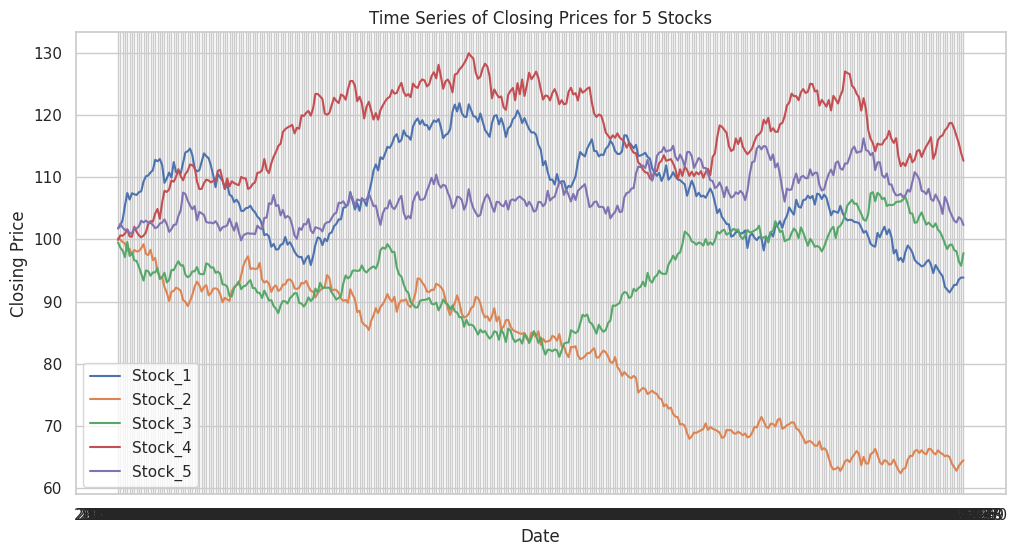

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

df.set_index('date', inplace=True)


plt.figure(figsize = (12,6))
for column in df.columns:
    plt.plot(df.index, df[column], label = column)

plt.title('Time Series of Closing Prices for 5 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

### 2. Outlier Detection in Prices

In [ ]:
df

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
date,,,,,
2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283
...,...,...,...,...,...
2020-12-26,92.684784,63.408103,98.288992,117.788079,102.995720
2020-12-27,92.688279,62.816639,98.061845,116.605106,102.718260
2020-12-28,93.551993,63.597651,96.454800,115.441164,103.566068


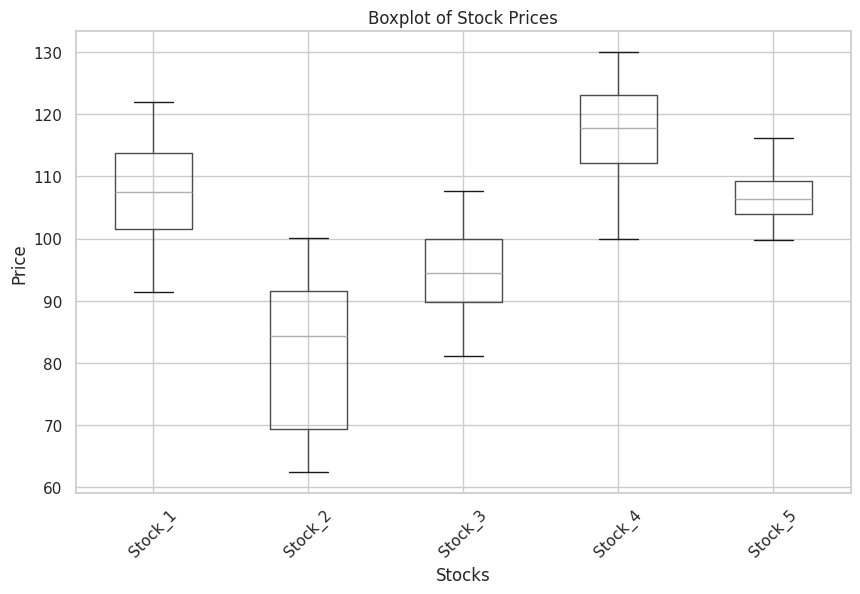

In [ ]:
if 'Date' in df.columns:
    df.drop('Date', axis=1, inplace=True)

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.xlabel('Stocks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Model Building and Evaluation

## Linear Regression
Linear Regression is a linear approach to modeling the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that there is a linear relationship between the features and the target variable, and it tries to fit a straight line to the data that minimizes the sum of the squared residuals.

Mean Squared Error: 28.92541401358996
Root Mean Squared Error: 5.378235213672786
R-squared Score: 0.3976048110834216


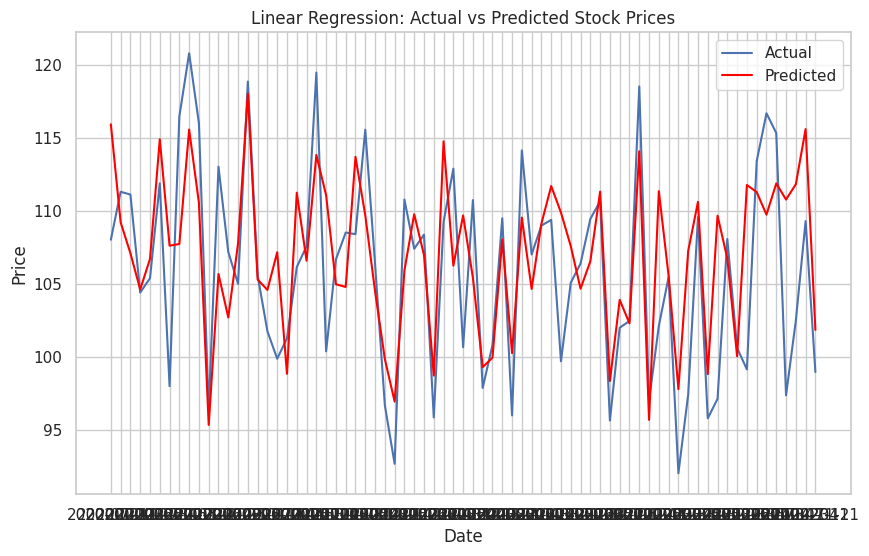

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.get_dummies(df)

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
